In [5]:
import warnings
warnings.filterwarnings('ignore')

### Importing required libraries

In [6]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import keras

### Setting directory path

In [7]:
image_train_dir = '/Users/manaranjan/Documents/Work/MyLearnings/DeepLearning/DL_DraftCourse/data/tomatoes/train/'
image_test_dir = '/Users/manaranjan/Documents/Work/MyLearnings/DeepLearning/DL_DraftCourse/data/tomatoes/test/'

### Creating Image Training Batches

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_generator = ImageDataGenerator(rescale=1./255)

In [19]:
train_data =   \
train_generator.flow_from_directory(image_train_dir,
                                    target_size = (256, 256),
                                    batch_size = 64,
                                    class_mode='binary')

Found 840 images belonging to 2 classes.


In [20]:
train_data.n

840

In [40]:
train_data.

840

In [21]:
train_data.class_indices

{'healthy': 0, 'unhealthy': 1}

In [22]:
train_data.image_shape

(256, 256, 3)

In [24]:
type(train_data)

keras.preprocessing.image.DirectoryIterator

In [25]:
X_batch, y_batch = next(train_data)

In [26]:
X_batch.shape

(64, 256, 256, 3)

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

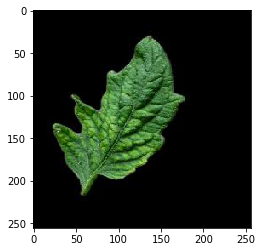

In [30]:
plt.imshow(X_batch[1])

In [31]:
y_batch[1]

1.0

### Creating test data generator

In [32]:
test_generator = ImageDataGenerator(rescale=1./255)
test_data =   \
test_generator.flow_from_directory(image_test_dir,
                                    target_size = (256, 256),
                                    batch_size = 32,
                                    class_mode='binary')

Found 200 images belonging to 2 classes.


In [34]:
test_data.n

200

In [35]:
test_data.class_indices

{'healthy': 0, 'unhealthy': 1}

### Build a CNN Model

In [48]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Activation, Flatten

In [43]:
Conv2D?

In [44]:
train_data.image_shape

(256, 256, 3)

In [62]:
model_v1 = Sequential()
## First Convolution Layer with 8 filters
model_v1.add(Conv2D(filters=8, 
                    kernel_size=(3,3), 
                    input_shape = train_data.image_shape))
model_v1.add(MaxPool2D(2,2))

## First Convolution Layer with 4 filters
model_v1.add(Conv2D(filters=4, 
                    kernel_size=(3,3)))
model_v1.add(MaxPool2D(2,2))

## Flatten
model_v1.add(Flatten())

## Add a Dense Layer and Activations: Layer 1
model_v1.add(Dense(64))
model_v1.add(Activation('relu'))

## Add a Dense Layer and Activations: Layer 2
model_v1.add(Dense(16))
model_v1.add(Activation('relu'))

## Add Output Layer
model_v1.add(Dense(1))
model_v1.add(Activation('sigmoid'))

In [63]:
model_v1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 254, 254, 8)       224       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 8)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 125, 125, 4)       292       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 4)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 15376)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                984128    
_________________________________________________________________
activation_7 (Activation)    (None, 64)                0         
__________

In [74]:
model_v1.compile(optimizer='adam',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

In [75]:
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

In [76]:
callback_list = [TensorBoard('./logs'),
                 EarlyStopping(monitor='val_loss',
                               patience=4),
                 ModelCheckpoint(filepath='tomatoes_disease.h5',
                                 save_best_only=True),
                 ReduceLROnPlateau(monitor='val_loss',
                                    factor=0.1, 
                                    patience=2)]

In [77]:
history_v1 = model_v1.fit_generator(train_data, 
                                    steps_per_epoch=10,
                                    epochs=10,
                                    callbacks = callback_list,
                                    validation_data=test_data,
                                    validation_steps=2)                                   

Epoch 1/10
10/10 [==============================] - 11s 1s/step - loss: 0.4657 - acc: 0.8126 - val_loss: 0.3202 - val_acc: 0.8594
Epoch 2/10
10/10 [==============================] - 12s 1s/step - loss: 0.2303 - acc: 0.9047 - val_loss: 0.1313 - val_acc: 0.9688
Epoch 3/10
10/10 [==============================] - 12s 1s/step - loss: 0.1686 - acc: 0.9480 - val_loss: 0.1395 - val_acc: 0.9688
Epoch 4/10
10/10 [==============================] - 12s 1s/step - loss: 0.1389 - acc: 0.9574 - val_loss: 0.1028 - val_acc: 0.9844
Epoch 5/10
10/10 [==============================] - 12s 1s/step - loss: 0.1405 - acc: 0.9563 - val_loss: 0.1171 - val_acc: 0.9844
Epoch 6/10
10/10 [==============================] - 11s 1s/step - loss: 0.1223 - acc: 0.9685 - val_loss: 0.1872 - val_acc: 0.9062
Epoch 7/10
10/10 [==============================] - 10s 1s/step - loss: 0.1007 - acc: 0.9716 - val_loss: 0.1652 - val_acc: 0.9219
Epoch 8/10
10/10 [==============================] - 11s 1s/step - loss: 0.1174 - acc: 0.97

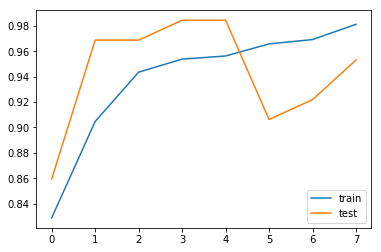

In [78]:
plt.plot(history_v1.history['acc'], label = 'train')
plt.plot(history_v1.history['val_acc'], label = 'test')
plt.legend()

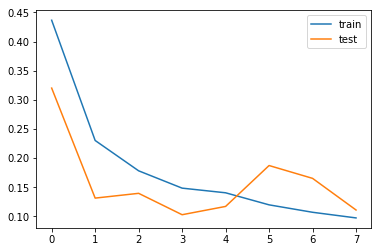

In [79]:
plt.plot(history_v1.history['loss'], label = 'train')
plt.plot(history_v1.history['val_loss'], label = 'test')
plt.legend()

## Predict on Test Data

In [82]:
pred_y = model_v1.predict_generator(test_data)

In [83]:
pred_y.shape

(200, 1)

In [84]:
pred_y[0:10]

array([[0.02353104],
       [0.9999329 ],
       [0.998516  ],
       [0.29374862],
       [0.9909388 ],
       [0.01880459],
       [0.45195994],
       [0.84643114],
       [0.9942449 ],
       [1.        ]], dtype=float32)